In [93]:
import warnings
warnings.filterwarnings("ignore")

### ESERCIZIO 1

A manufacturer records ten correlated sensor readings from 400 wearable devices. The devices occa-
sionally enter one of three hidden operating modes. You are given the data frame

Perform PCA. Plot the scree curve and the cumulative variance curve. How many components
explain at least 95% of the variance? 

In [31]:
# load the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("wearable_sensors.csv")

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(df)

Explained variance ratio: [3.82537215e-01 2.29561688e-01 1.93292037e-01 1.10255869e-01
 4.70128381e-02 2.89621945e-02 7.15402111e-03 4.68536200e-04
 3.98256078e-04 3.57344541e-04]
Cumulative explained variance: [0.38253721 0.6120989  0.80539094 0.91564681 0.96265965 0.99162184
 0.99877586 0.9992444  0.99964266 1.        ]


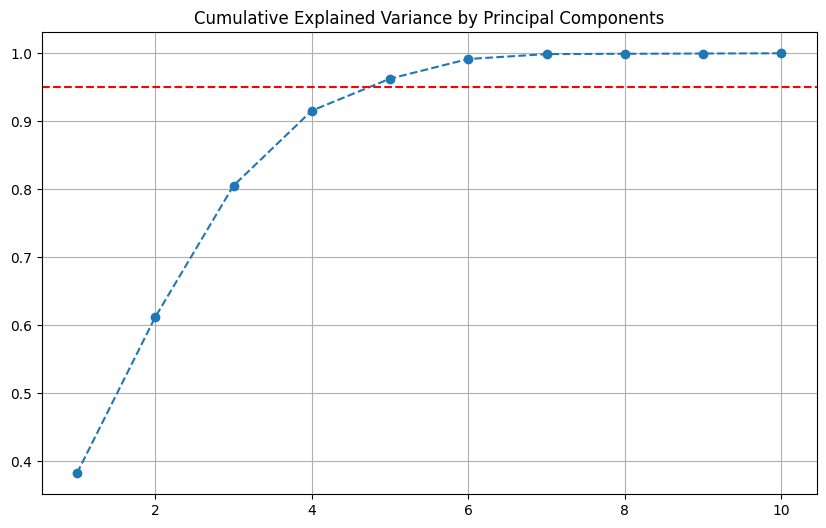

In [43]:
import matplotlib.pyplot as plt
# computing the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
# cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_variance)
# plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.grid()
plt.title('Cumulative Explained Variance by Principal Components')
# plotting the line at 0.95 threshold
plt.axhline(y=0.95, color='r', linestyle='--')


Plot the loadings of the first 2 PCs and interpret them.

Loadings for PC1: [ 0.10249066 -0.32477826  0.40209519  0.52920913 -0.26270492  0.25950473
  0.11353078 -0.26485875  0.0892319   0.46358774]
Loadings for PC2: [-0.1275551   0.20988642  0.202834   -0.42849084 -0.14762764  0.02245124
  0.53274435  0.38042466 -0.11410377  0.5010731 ]


<BarContainer object of 10 artists>

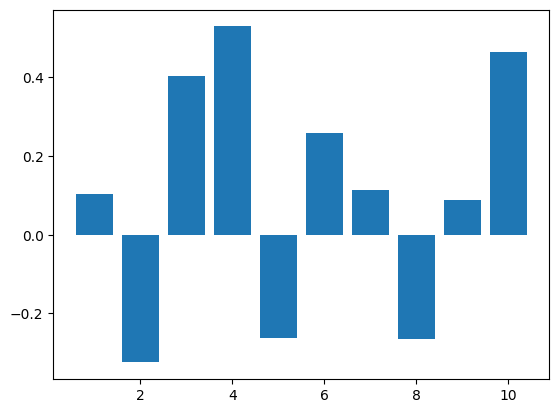

In [40]:
# Loadings are the weights of the original features in the principal components
loadings = pca.components_.T 
l_pc1 = loadings[0]
l_pc2 = loadings[1]
print("Loadings for PC1:", l_pc1)
print("Loadings for PC2:", l_pc2)

plt.bar(range(1, len(l_pc1)+1), l_pc1, label='PC1 Loadings')


<BarContainer object of 10 artists>

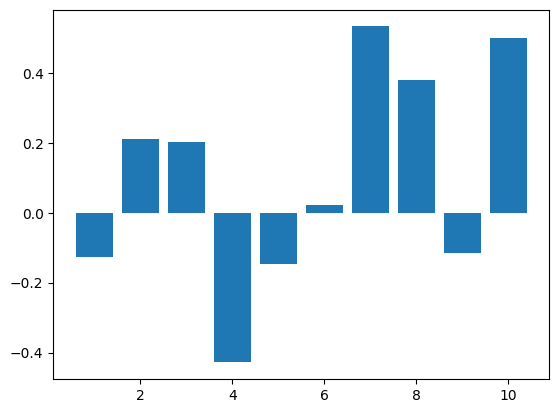

In [39]:
#creating 2 images
plt.bar(range(1, len(l_pc2)+1), l_pc2, label='PC2 Loadings')



In [48]:
X_pca = df_pca[:, :5]


Using the retained PCs, compare hierarchical clustering and K–means.
(a) For the K-Means, use the elbow method to select the optimal number of clusters.
(b) For the hierarchical clustering, use the average linkage and cut the dendrogram to obtain
the same number of clusters as K-means.
For K-means: Report the within cluster sum of square associated with the optimal number
of cluster.
Report the silhouette scores for both K-means (with optimal number of clusters) and hierar-
chical clustering, and comment on which algorithm performs better.
Fit Gaussian Mixture Models with 1–5 components, select the best model via BIC, and
compare its cluster assignments with K–means using the adjusted Rand index.

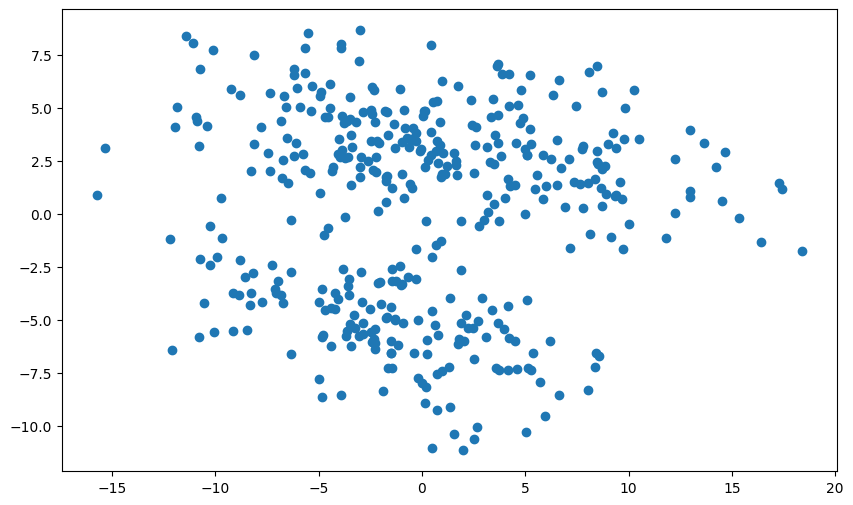

In [ ]:
# plotting the 2 pcs just to see how they look like
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

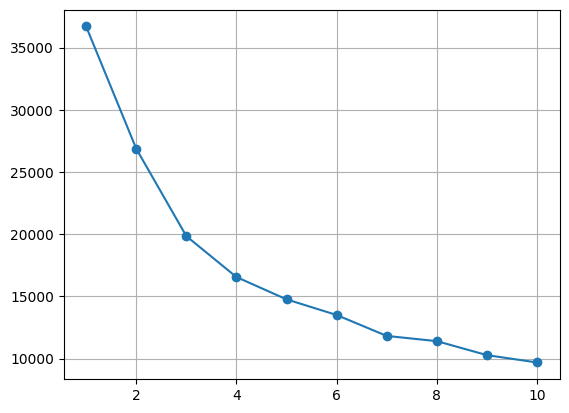

In [53]:
# kmeans with elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
# Elbow method for KMeans

ks = range(1, 11)
wcss = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(ks, wcss, marker='o')
plt.grid()

In [73]:
# probably the best k is 3
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans.fit(X_pca)
kmeans_labels = kmeans.labels_

clusterings = {}
clusterings['kmeans'] = kmeans_labels 

wcss = kmeans.inertia_

silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)
clusterings['kmeans_silhouette'] = silhouette_kmeans
clusterings['kmeans_wcss'] = wcss

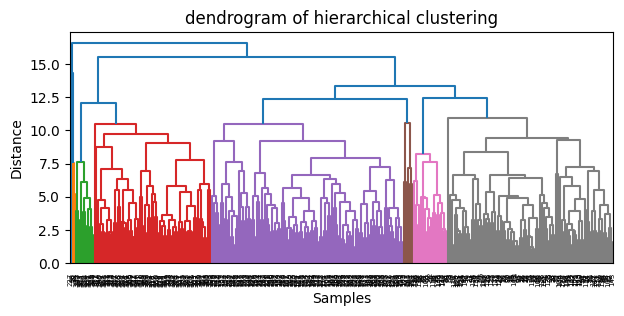

In [66]:
def plot_dendrogram(linkage_matrix, title):
    plt.figure(figsize=(7, 3))
    dendrogram(linkage_matrix)
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
method = "average"
cut_height = 15# TODO insert an appropriate value here

# Obtain the dendrogram and cut it at the correct height

linkage_matrix =  linkage(X_pca, method=method)
clusters = fcluster(linkage_matrix, t=cut_height, criterion='distance') 

plot_dendrogram(linkage_matrix, "dendrogram of hierarchical clustering")

In [74]:
clusterings['hierarchical'] = clusters
silhoutte_hierarchical = silhouette_score(X_pca, clusters)
clusterings['hierarchical_silhouette'] = silhoutte_hierarchical

clusterings 

{'kmeans': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1,

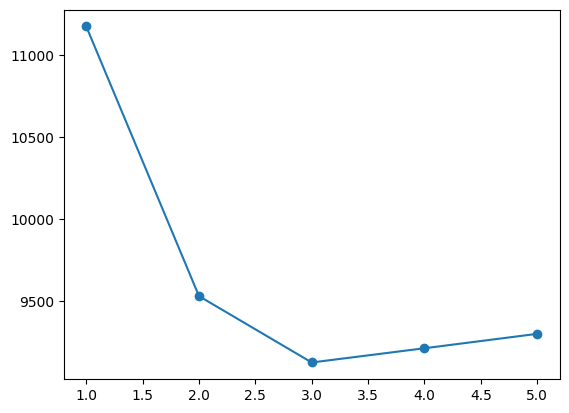

In [ ]:
# selecting the best GMM model based on BIC
bic_scores = []
for n_com in range(1,6):
    gmm = GaussianMixture(n_components=n_com, random_state=42)
    gmm.fit(X_pca)
    bic_scores.append(gmm.bic(X_pca))
plt.plot(range(1, 6), bic_scores, marker='o')

In [76]:
best_n_com = 3
gmm = GaussianMixture(n_components=best_n_com, random_state=42)
gmm.fit(X_pca)
gmm_labels = gmm.predict(X_pca)

In [79]:
# comparing the clusterings with adjusted Rand index
ari_kmeans_gmm = adjusted_rand_score(kmeans_labels, gmm_labels)

### ESERCIZIO 2

The file credit_default.csv contains 15 applicant features and the response default (1 = de-
faulted).
Use the following command to split the dataset into training a test set:
X train, X test, y train, y test = train test split(
X, y, test size=0.3, random state=42, stratify=y)
Scale the features to have zero mean and unit variance.

In [148]:
df = pd.read_csv('credit_default.csv')
X = df.drop(columns=['default'])
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [160]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


1. Fit a standard logistic regression. Estimate test accuracy via 10–fold cross–validation. Compare the estimated test accuracy with the actual test accuracy.

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

scorings ={}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear'))
])

cv_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=10, scoring='accuracy')

pipeline.fit(X_train_scaled, y_train)
test_accuracy = pipeline.score(X_test_scaled, y_test)


scorings['Logistic Regression cv'] = cv_scores.mean()
scorings['Logistic Regression test'] = test_accuracy

scorings

{'Logistic Regression cv': np.float64(0.7), 'Logistic Regression test': 0.65}

2. Repeat with ridge and lasso penalties. Use 10-fold cross-validation to estimate the parameters.
Report the best Cvalues and compare test accuracies.

In [162]:
# using gridsearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', penalty='l2'))
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', penalty='l1'))
])      

param_grid = {
    'classifier__C': np.logspace(-4, 4, 10)
}

ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=10, scoring='accuracy')
lasso_grid = GridSearchCV(lasso_pipeline, param_grid, cv=10, scoring='accuracy')

ridge_grid.fit(X_train_scaled, y_train)
lasso_grid.fit(X_train_scaled, y_train)


scorings['Ridge cv acc'] = ridge_grid.best_score_
scorings['Ridge test accuracy'] = ridge_grid.score(X_test_scaled, y_test)
scorings['Ridge best alpha'] = ridge_grid.best_params_['classifier__C']

scorings['Lasso cv acc'] = lasso_grid.best_score_
scorings['Lasso test accuracy'] = lasso_grid.score(X_test_scaled, y_test)
scorings['Lasso best alpha'] = lasso_grid.best_params_['classifier__C']

scorings

{'Logistic Regression cv': np.float64(0.7),
 'Logistic Regression test': 0.65,
 'Ridge cv acc': np.float64(0.7625),
 'Ridge test accuracy': 0.75,
 'Ridge best alpha': np.float64(0.005994842503189409),
 'Lasso cv acc': np.float64(0.78125),
 'Lasso test accuracy': 0.725,
 'Lasso best alpha': np.float64(0.046415888336127774)}

3. Train a random forest (300 trees, oob score=True). Report OOB accuracy, test accuracy,
and plot the top–10 feature importances.

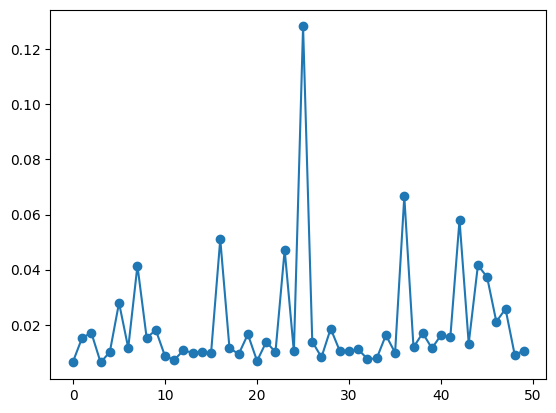

In [202]:
# training a random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=42)
rf.fit(X_train_scaled, y_train)
scorings['RF oob score'] = rf.oob_score_
scorings['RF test accuracy'] = rf.score(X_test_scaled, y_test)
importances = rf.feature_importances_
importances

plt.plot(importances, marker='o')
#showing all the labels on the x-axis

In [ ]:
rf.predict_

array([0.66      , 0.26      , 0.26666667, 0.76333333, 0.73      ,
       0.17333333, 0.76333333, 0.48333333, 0.22666667, 0.76333333,
       0.66333333, 0.42      , 0.44666667, 0.22666667, 0.89      ,
       0.62333333, 0.25      , 0.69666667, 0.66666667, 0.38      ,
       0.34666667, 0.15333333, 0.13      , 0.14333333, 0.31333333,
       0.12666667, 0.28333333, 0.34666667, 0.20666667, 0.78333333,
       0.68      , 0.60666667, 0.85      , 0.86666667, 0.65      ,
       0.42333333, 0.85      , 0.14      , 0.27333333, 0.79333333])

In [164]:
df_importances = pd.DataFrame(importances, index=X_train_scaled.columns, columns=[0])
#sorting the dataframe by importances
df_importances.sort_values(by = 0, ascending=False, inplace=True)
df_importances.iloc[:10]

,0
feat_26,0.128284
feat_37,0.066568
feat_43,0.058033
feat_17,0.051005
feat_24,0.047178
feat_45,0.041632
feat_8,0.041451
feat_46,0.037289
feat_6,0.027954
feat_48,0.025761



4. Report the adjusted rand index between the top–10 features according to random forest and
the features selected by Lasso with the optimal Cparameter.

In [165]:
# best features according to Lasso
lasso_best_C = lasso_grid.best_params_['classifier__C']
lasso_best_C

np.float64(0.046415888336127774)

In [ ]:
import statsmodels.api as sm

lasso = LogisticRegression(solver='liblinear', penalty='l1', C=lasso_best_C)
lasso.fit(X_train_scaled, y_train)
# ari index between the top-10 features according to random forest and the features selected by Lasso
mask = lasso.coef_ != 0
lasso_features = X_train_scaled.columns[mask[0]]
top_ten_feature = df_importances.index[:10]
top_ten_feature.shape, lasso_features.shape
# ari for the top-10 features according to random forest and the features selected by Lasso
from sklearn.metrics import adjusted_rand_score


((10,), (2,))

In [195]:
lasso_features = [1 if feature in lasso_features else 0 for feature in X_train.columns]
top_ten_feature = [1 if feature in top_ten_feature else 0 for feature in X_train.columns]
ari = adjusted_rand_score(top_ten_feature, lasso_features)

5. Plot ROC curves and compute AUC for all the models. Which model would you deploy and
why? (max 5 sentences).

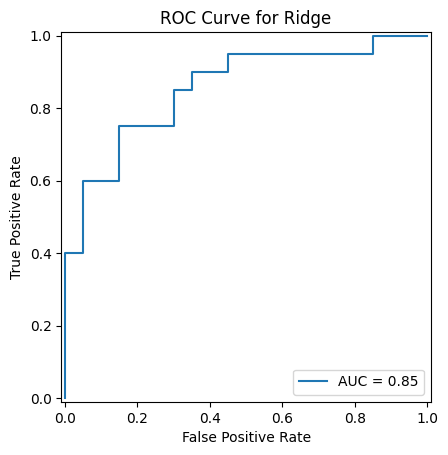

AUC for Ridge


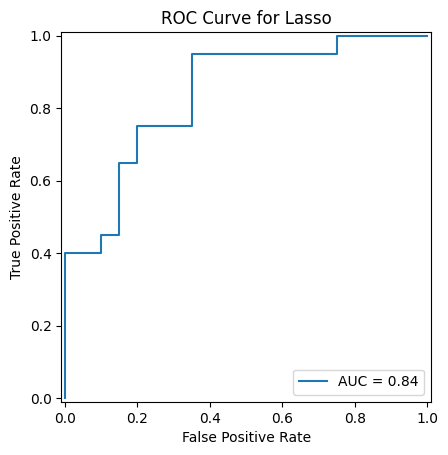

AUC for Lasso


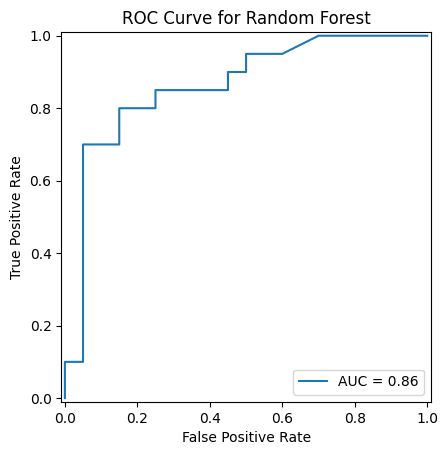

AUC for Random Forest


In [207]:
# Forward Selection
import statsmodels.api as sm
# plotting the ROC curves and computing AUC for all the models
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

model_1 = ridge_grid.best_estimator_
model_2 = lasso_grid.best_estimator_
model_3 = rf 

models = [model_1, model_2, model_3]
names = ['Ridge', 'Lasso', 'Random Forest']
for model in models:
    y_scores = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
    plt.title(f'ROC Curve for {names[models.index(model)]}')
    plt.show()
    print(f'AUC for {names[models.index(model)]}')